In [3]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

nsample = 20
x = np.linspace(0,10,nsample)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

# 一元线性回归

In [4]:
X = sm.add_constant(x)
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.52631579],
       [ 1.        ,  1.05263158],
       [ 1.        ,  1.57894737],
       [ 1.        ,  2.10526316],
       [ 1.        ,  2.63157895],
       [ 1.        ,  3.15789474],
       [ 1.        ,  3.68421053],
       [ 1.        ,  4.21052632],
       [ 1.        ,  4.73684211],
       [ 1.        ,  5.26315789],
       [ 1.        ,  5.78947368],
       [ 1.        ,  6.31578947],
       [ 1.        ,  6.84210526],
       [ 1.        ,  7.36842105],
       [ 1.        ,  7.89473684],
       [ 1.        ,  8.42105263],
       [ 1.        ,  8.94736842],
       [ 1.        ,  9.47368421],
       [ 1.        , 10.        ]])

In [5]:
beta = np.array([2,5])
beta #参数

array([2, 5])

In [6]:
e = np.random.normal(size=nsample)
e #残差

array([ 1.32212576,  0.46709057, -0.33122932, -0.30068926, -2.39846059,
       -2.07488707, -1.84419173, -0.38573817, -2.07966381,  1.03960771,
       -2.03651471,  0.92310125, -0.73859084, -1.65201137, -0.68001177,
       -0.00825046, -1.04031684,  0.94718668, -0.82884972,  0.28601459])

In [7]:
y = np.dot(X,beta) + e
y

array([ 3.32212576,  5.09866952,  6.93192858,  9.59404758, 10.1278552 ,
       13.08300767, 15.94528195, 20.03531447, 20.97296777, 26.72381824,
       26.27927476, 31.87046967, 32.84035653, 34.55851495, 38.1620935 ,
       41.46543375, 43.06494632, 47.68402878, 48.53957133, 52.28601459])

In [8]:
model = sm.OLS(y,X)

In [9]:
res = model.fit()

In [10]:
res.params #回归系数

array([1.34211929, 5.01743335])

In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3199.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.00e-21
Time:                        05:11:31   Log-Likelihood:                -31.039
No. Observations:                  20   AIC:                             66.08
Df Residuals:                      18   BIC:                             68.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3421      0.519      2.587      0.019       0.252       2.432
x1             5.0174      0.089     56.559      0.000       4.831       5.204
==============================================================================
Omnibus:                        2.759   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                1.190
Skew:                           0.052   Prob(JB):                        0.552
Kurtosis:                       1.809   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.994   
Dependent Variable: y                AIC:                66.0772 
Date:               2022-07-14 05:11 BIC:                68.0687 
No. Observations:   20               Log-Likelihood:     -31.039 
Df Model:           1                F-statistic:        3199.   
Df Residuals:       18               Prob (F-statistic): 1.00e-21
R-squared:          0.994            Scale:              1.4497  
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    1.3421      0.5189     2.5866    0.0186    0.2520    2.4322
x1       5.0174      0.0887    56.5591    0.0000    4.8311    5.2038
-----------------------------------------------------------------
Omnibus:              2.759        Durbin-Watson:           2.043
Prob(Omnibus):        0.252        Jarque-Bera (JB):        1.190
Skew:                 0.052        Prob(JB):                0.552
Kurtosis:             1.809        Condition No.:           12   
=================================================================

"""

In [13]:
#拟合的估计值
y_ = res.fittedvalues
y_

array([ 1.34211929,  3.98287369,  6.62362808,  9.26438248, 11.90513687,
       14.54589127, 17.18664566, 19.82740006, 22.46815445, 25.10890885,
       27.74966324, 30.39041764, 33.03117203, 35.67192643, 38.31268082,
       40.95343522, 43.59418961, 46.23494401, 48.8756984 , 51.5164528 ])

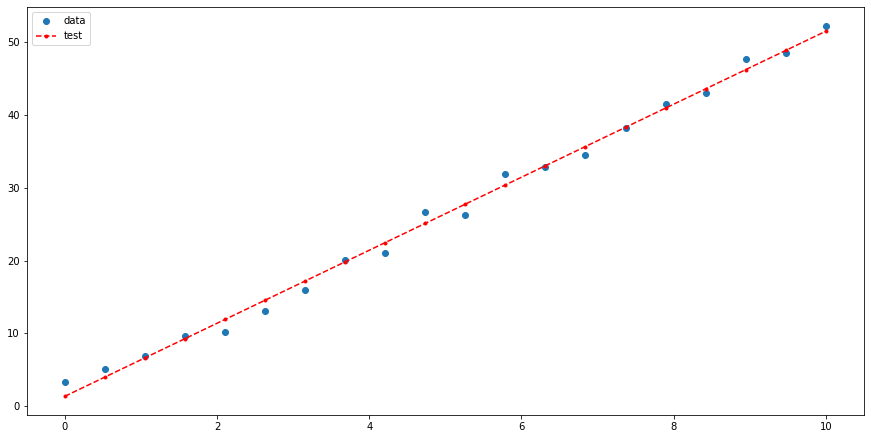

In [14]:
fig,ax = plt.subplots(figsize=(15,7.5))
ax.plot(x,y,'o',label='data') #原始数据
ax.plot(x,y_,'r--.',label='test')#拟合数据
ax.legend(loc='best')
plt.show()

# 高阶回归

In [15]:
# Y=5+2X+3X^2

nsample = 50
x = np.linspace(0,10,nsample)
X = np.column_stack((x,x**2))
X = sm.add_constant(X)

In [16]:
beta = np.array([5,2,3])
e = np.random.normal(size=nsample)
y = np.dot(X,beta) + e
model = sm.OLS(y,X)
results = model.fit()
results.params

array([4.78329581, 2.0645644 , 2.99688495])

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.907e+05
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.35e-92
Time:                        05:11:40   Log-Likelihood:                -74.729
No. Observations:                  50   AIC:                             155.5
Df Residuals:                      47   BIC:                             161.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7833      0.454     10.543      0.000       3.871       5.696
x1             2.0646      0.210      9.839      0.000       1.642       2.487
x2             2.9969      0.020    147.689      0.000       2.956       3.038
==============================================================================
Omnibus:                        4.186   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                3.623
Skew:                          -0.659   Prob(JB):                        0.163
Kurtosis:                       3.030   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

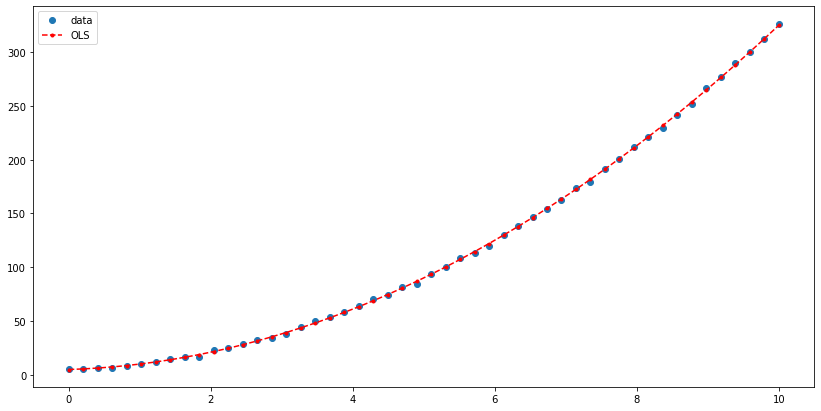

In [18]:
y_fitted = results.fittedvalues
fig,ax = plt.subplots(figsize=(14,7))
ax.plot(x,y,'o',label='data')
ax.plot(x,y_fitted,'r--.',label='OLS')
ax.legend(loc='best')
plt.show()

# 分类变量

假设分类变量有3个取值（a,b,c)，比如考试等级有3个等级。那么a就是（1，0，0），b(0,1,0),c(0,0,1),这个时候就需要3个系数β0，β1，β2，也就是β0*0+β1*1+β2*2

In [19]:
nsample = 50
groups = np.zeros(nsample,int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [20]:
import pandas as pd
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups,drop=True)
dummy

/Users/duoduoyu/virtual_environment/lib/python3.8/site-packages/statsmodels/tools/tools.py:152: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  warnings.warn(


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [21]:
#Y=5+2X+3Z1+6Z2+9Z3
import statsmodels.api as sm
x = np.linspace(0,20,nsample)
X = np.column_stack((x,dummy))
X = sm.add_constant(X)
beta = [5,2,3,6,9]
e = np.random.normal(size=nsample)
y = np.dot(X,beta) + e
result = sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3252.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.53e-53
Time:                        05:11:59   Log-Likelihood:                -69.323
No. Observations:                  50   AIC:                             146.6
Df Residuals:                      46   BIC:                             154.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2325      0.572     14.397      0.000       7.081       9.384
x1             2.0042      0.066     30.462      0.000       1.872       2.137
x2            -0.5401      0.363     -1.489      0.143      -1.270       0.190
x3             2.8367      0.303      9.360      0.000       2.227       3.447
x4             5.9359      0.683      8.694      0.000       4.562       7.310
==============================================================================
Omnibus:                        2.712   Durbin-Watson:                   2.361
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                1.733
Skew:                          -0.344   Prob(JB):                        0.420
Kurtosis:                       3.598   Cond. No.                     1.68e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""